
## Volume 2: OpenGym



Sophie
Amber
03/03/22





**Note:** Some IPython notebook platforms (such as Google Colab) do not currently support rendering OpenAI environments. In order to properly render the OpenGym environments in this lab, you may need to run the Jupyter Notebook locally (for example, run it in VSCode or from the command line).

In [26]:
import gym
import numpy as np
from IPython.display import clear_output
import random
from matplotlib import pyplot as plt

**Problem 1**

*   Implement `random_blackjack()`.
*   Run the game 500 times and output the percentage of games that are wins.



In [27]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """
    #keep track of wins
    wins = 0
    env = gym.make("Blackjack-v1")

    #create and reset the game n times
    for i in range(n):
        env.reset()
        game = False
        #play until game is over as returned by results
        while game == False:
            results = env.step(env.action_space.sample())
            game = results[2]
        if results[1] == 1:
            wins += 1
    return float(wins)/float(n)


In [28]:
# Run the game here
print(random_blackjack(500))

0.276


**Problem 2**

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [29]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10000 iterations
                         that the player wins
    """
    #keep track of wins
    wins = 0
    env = gym.make("Blackjack-v1")

    #create and reset the game n times
    for i in range(10000):
        env.reset()
        game = False
        #play until game is over as returned by results
        #take initial step
        results = env.step(1)
        while game == False:
            #check to see if the sum is less than or equal to number passed in
            if results[0][0] <= n:
                results = env.step(1)
            else:
                results = env.step(0)
            game = results[2]
        if results[1] == 1:
            wins += 1
    return float(wins)/float(10000)

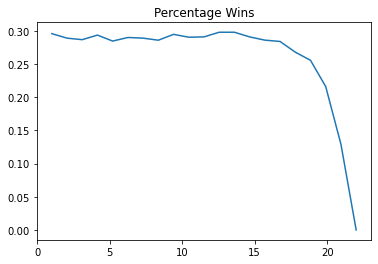

In [30]:
# Plot here
perc = []
for i in range(1, 22):
    perc.append(blackjack(i))
domain = np.linspace(1, 22, 21)
plt.plot(domain, perc)
plt.title("Percentage Wins")
plt.show()

*Identify which value(s) give the highest winrate here*

**Problem 3**

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [31]:
# Problem 3
def cartpole(render=False):
    """
    Solve CartPole-v0 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make("CartPole-v1")
    try:
        results = env.reset()
        game = False
        iters = 0

            
        #keep playing until game is terminated
        while game == False:
            if render == True:
                env.render()

            if results[3] < 0:
                results, i, game, _ = env.step(0)
                iters += i
            else:
                results, i, game, _ = env.step(1)
                iters += i
    #close the environment if render is true
    finally:
        if render:
            exit()
        env.close()
    return iters


    

In [32]:
# Render the game and run once here
#cartpole(True)

In [33]:
# Run the game here and print average steps to termination
avg = 0
#reord the number of steps taken
for i in range(100):
    avg += cartpole()
print(avg/100.0)

195.98


**Problem 4**

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [34]:
# Problem 4
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position
    of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    env = gym.make("MountainCar-v0")
    try:
        results = env.reset()
        game = False
        iters = 0

            
        #keep playing until game is terminated
        while game == False:
            if render == True:
                env.render()

            if results[1] < 0:
                results, i, game, _ = env.step(0)
                iters -= i
            else:
                results, i, game, _ = env.step(2)
                iters -= i
    #close the environment if render is true
    finally:
        if render:
            exit()
        env.close()
    return iters
    

In [35]:
# Render the game here
#car(True)

In [36]:
# Run the game here and print average steps to termination
avg = 0
#reord the number of steps taken
for i in range(100):
    avg += car()
print(avg/100.0)

119.08


**Helper Function for Problem 5**

In [37]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n,env.action_space.n))

    # Train
    for i in range(1,100001):
        # Reset state
        state = env.reset()

        epochs, penalties, reward, = 0,0,0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.")
    return q_table


**Problem 5**

* Render the "`Taxi-v3`" environment, act randomly until it terminates, and calculate the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and calculate the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [38]:
# Random actions Taxi game

env = gym.make("Taxi-v3")
env.reset()
env.render()
game = False
i = 0
#play until game is over as returned by results
while game == False:
    results = env.step(env.action_space.sample())
    game = results[2]
    reward = results[1]
    i += reward
    env.render()
print(i)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B

In [39]:
# Q-table actions Taxi game
env = gym.make("Taxi-v3")
obs = env.reset()
env.render()
game = False
i = 0
Q = find_qvalues("Taxi-v3")
#play until game is over as returned by results
while game == False:
    results = env.step(np.argmax(Q[obs,:]))
    obs = results[0]
    game = results[2]
    reward = results[1]
    i += reward
    env.render()
print(i)

Episode: 100000
Training finished.
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : |

In [40]:
def taxi(q_table):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 10000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 10000 runs
    """
    rand_reward = 0
    Q_reward = 0
    r_ = 0
    _r = 0

    #calculate random reward
    for i in range(10000):
        env = gym.make("Taxi-v3")
        env.reset()
        game = False
        r_ = 0

        #play until game is over as returned by results
        while game == False:
            results = env.step(env.action_space.sample())
            game = results[2]
            reward = results[1]
            r_ += reward
        rand_reward += r_

    avg_rand = rand_reward/10000.0

    #calculate q_table reward
    for i in range(10000):
        env = gym.make("Taxi-v3")
        obs = env.reset()
        game = False
        _r = 0

        #play until game is over as returned by results
        while game == False:
            results = env.step(np.argmax(q_table[obs,:]))
            obs = results[0]
            game = results[2]
            reward = results[1]
            _r += reward
        Q_reward += _r

    avg_Q = Q_reward/10000.0

    #return both averages
    return(avg_rand, avg_Q)

In [41]:
# Print the average rewards of the Taxi game for both algorithms run 10,000 times
print(taxi(find_qvalues("Taxi-v3")))

Episode: 100000
Training finished.
(-770.6177, 7.932)
